# **Step 1: Frame the problem**

The California housing dataset is a supervised learning task as it involves labeled input data. It is a regression task because the goal is to predict a numeric value.

# **Step 2: Loading and exploring the data**

Step 2: Loading and Exploring the Data
Load the dataset where each row represents an area with features such as median_income, housing_median_age, and ocean_proximity. The target variable is median_house_value, which we aim to predict.

In [76]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


# Function to load the data from the internet
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

# Load the dataset
housing = load_housing_data()

**Inspecting the Data Structure.**

After loading the dataset, we examine its structure to understand the features, target variable, and data types. We check for missing values, review summary statistics, and explore the general data layout.

In [77]:
# Display the first few rows of the dataset
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [78]:
# Get an overview of the data types, non-null counts, and memory usage
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


This helps us understand the data types and identify any missing values. Specifically, we observe that total_bedrooms has missing values, and ocean_proximity is a categorical (object) variable.

In [79]:
# To find out how many districts belong to each attribute of the ocean_proximity
housing["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [80]:
# Display summary statistics for numerical columns
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **Step 3: Data visualization.**

We use visualizations to explore data distributions and uncover relationships between features. This provides insights into patterns and potential correlations in the dataset.

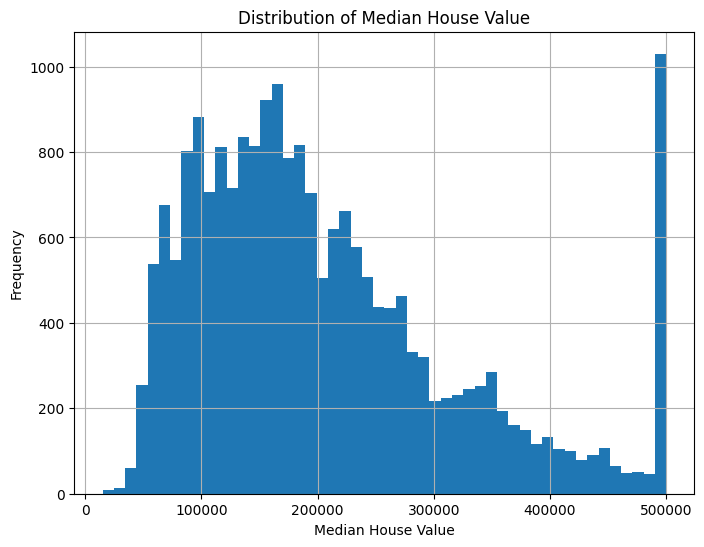

In [81]:
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
housing["median_house_value"].hist(bins=50)
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Distribution of Median House Value")
plt.show()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

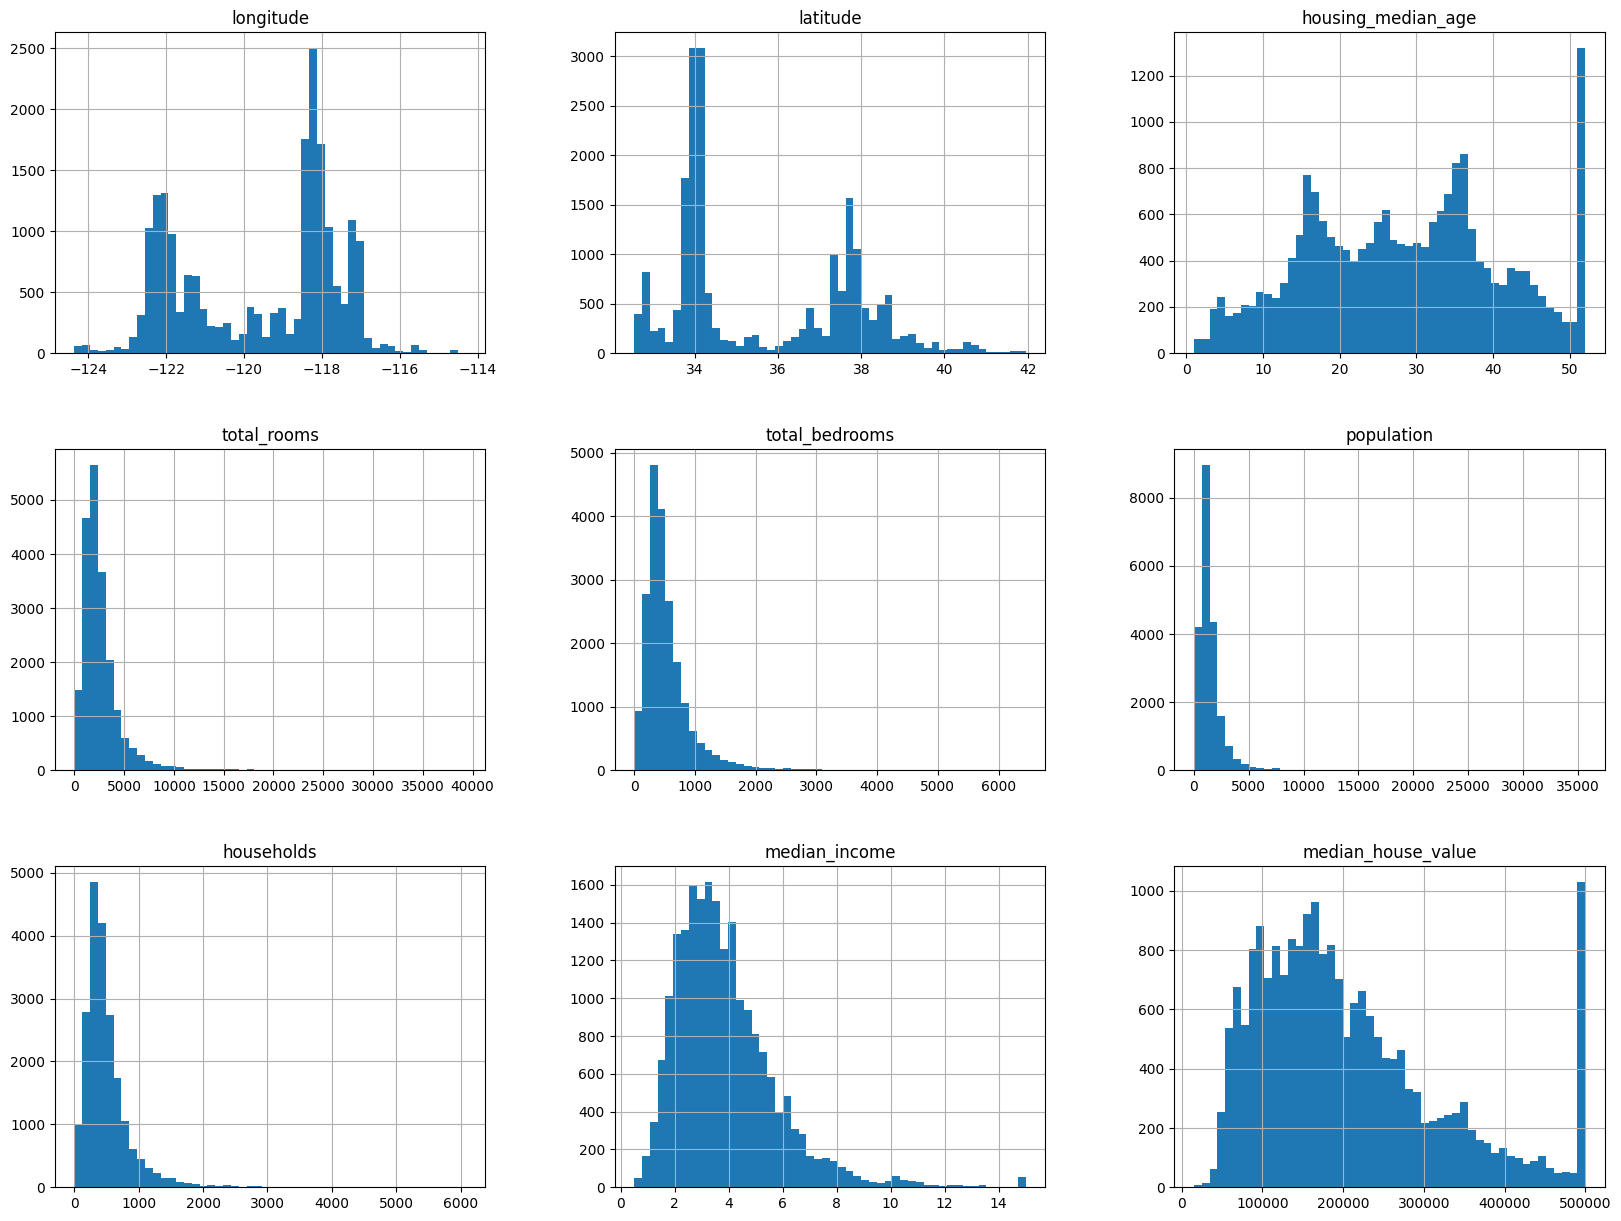

In [82]:
%matplotlib inline
# Plot the distribution of the entire variable
housing.hist(bins=50, figsize=(20, 15))

In [83]:
# Compute the correlations between every attribute
housing_numeric = housing.select_dtypes(include=[float, int])  # Select only numeric columns
correlations = housing_numeric.corr()  # Compute correlations
correlations["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


This reveals the correlations between all attributes. Additionally, we can use a heatmap to visualize the linear relationships between numerical features and the target variable.

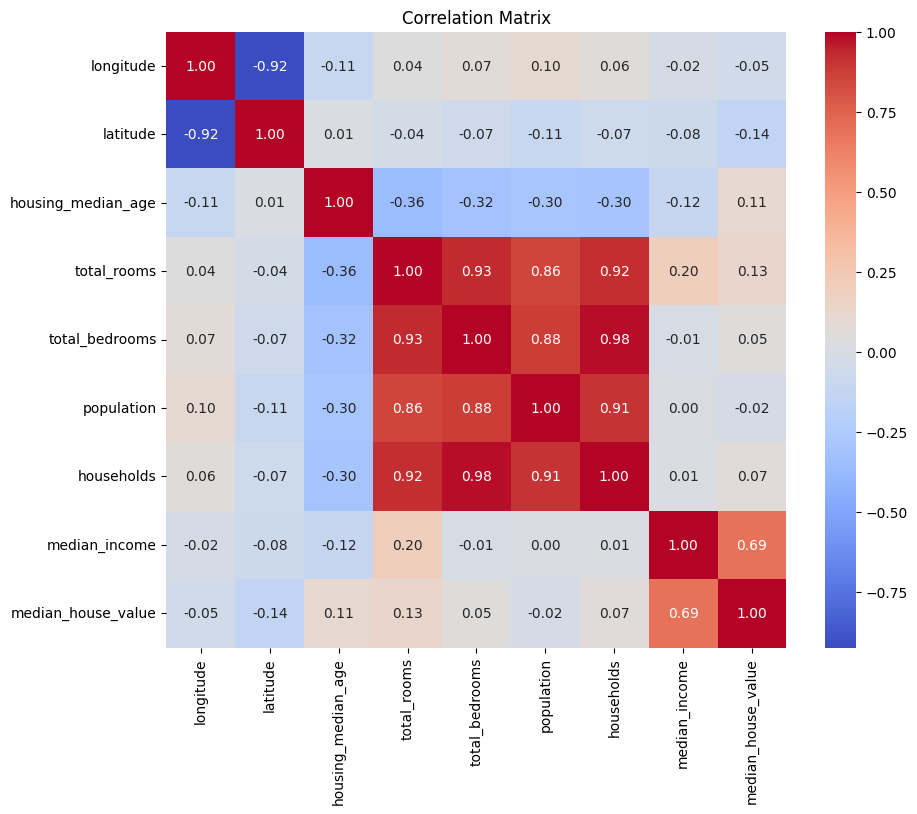

In [84]:
import seaborn as sns

plt.figure(figsize=(10, 8))
housing_numeric = housing.select_dtypes(include=[float, int])  # Select only numeric columns
correlation_matrix = housing_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

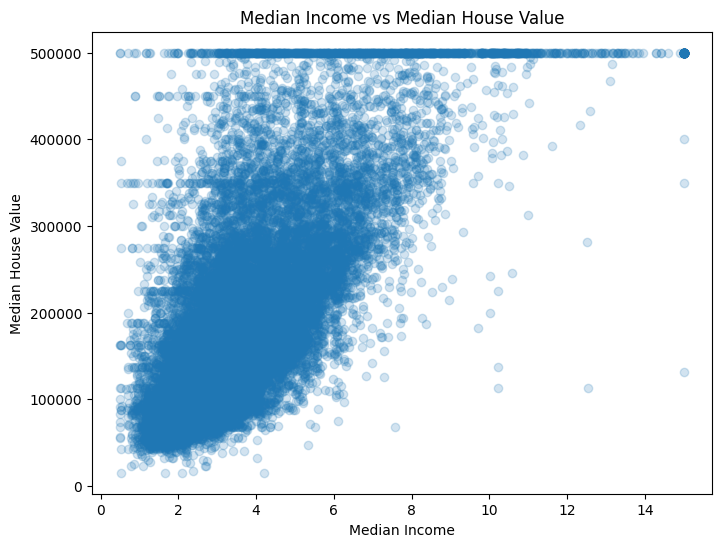

In [85]:
# Scatter plots to see the relationships between numerical feature
# Scatter plot of median_income vs median_house_value
plt.figure(figsize=(8, 6))
plt.scatter(housing["median_income"], housing["median_house_value"], alpha=0.2)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()


# **Step 4: Split the data**

We split the dataset into training and testing sets to train and evaluate our models. Typically, the test set constitutes about 20% of the dataset.


In [86]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Number of train set: {len(train_set)}\nNumber of in test set: {len(test_set)}\n")

Number of train set: 16512
Number of in test set: 4128



A random split is generally acceptable for large datasets with sufficient attributes. However, for smaller datasets, this method risks introducing sampling bias. Stratified sampling ensures the test set is representative of the overall population by dividing it into homogeneous subgroups (strata) and sampling instances proportionally from each stratum.

For instance, in a well-conducted survey, demographic proportions like gender would be preserved to avoid biased results. Random sampling might lead to imbalances, such as an unrepresentative gender ratio, which could skew the findings.

Importance of Stratified Sampling in Housing Data

From the heatmap and scatter plot, we observed that median_income is highly influential in predicting median_house_value. To ensure the test set represents income categories accurately, we must convert the continuous median_income attribute into categorical strata.

Creating Income Categories

Most median_income values cluster between $20,000 and  $50,000, with some exceeding $60,000. To balance strata and avoid bias, the dataset needs a manageable number of categories with sufficient instances in each. Using pd.cut(), we create an income category attribute with five groups:



*  Category 1: Income less than \$15,000 (0 to 1.5)
*  Category 2: Income \$15,000 to \$30,000 (1.5 to 3)
*  Category 3: Income \$30,000 to \$45,000 (3 to 4.5)
*  Category 4: Income \$45,000 to \$60,000 (4.5 to 6)
*  Category 5: Income above \$60,000 (6 and up)



This ensures the test set is representative of income distributions and minimizes bias in predicting housing prices.

In [87]:
import numpy as np
housing["income_categories"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

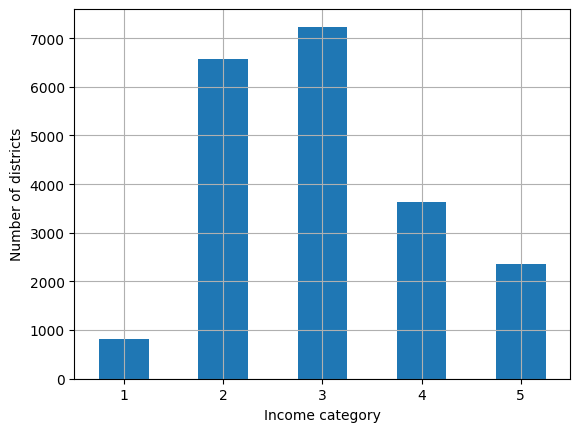

In [88]:
housing["income_categories"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [89]:
# To incorporate the stratified sampling based on the income categories
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_categories"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [90]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In [91]:
# Generates the table and compares the different sampling types (housing, test_set, and stratisfied_test)
def income_categories_proportions(data):
    return data["income_categories"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_categories_proportions(housing),
    "Stratified": income_categories_proportions(strat_test_set),
    "Random": income_categories_proportions(test_set),
}).sort_index()
compare_props

,Overall,Stratified,Random
income_categories,,,
1,0.039789,0.039971,0.038753
2,0.318859,0.318798,0.315471
3,0.350594,0.350533,0.356343
4,0.176296,0.176357,0.174992
5,0.114462,0.114341,0.114441


In [92]:
# We remove the income_categories, we don't need it anymore, we just use it to create an unbias split of the dataset
housing  = housing.drop(['income_categories'], axis=1)

In [93]:
print(f"Number of train set: {len(strat_train_set)}\nNumber of in test set: {len(strat_test_set)}\n")

Number of train set: 16512
Number of in test set: 4128



# **Step 5: Data Cleaning**

**Handling Missing Values:** To handle missing values, we will fill them with the median of their respective columns. For instance, the total_bedrooms column, which has missing values, will be imputed using the column’s median.

**Encoding categorical data:** We will use O**ne-Hot Encoding** to convert categorical data into numerical format. For example, the ocean_proximity column, being categorical, will be transformed into numerical representation using this method.

**Step 4: Feature engineering:**

**Correlated features:** Based on the heatmap analysis, we observed correlations between some features. Using domain knowledge, we will create the following new features to enhance our model:

	1.	rooms_per_household = total_rooms/households.

	2.	bedrooms_per_room = total_bedrooms/total_rooms

	3.	population_per_household = population/households

**Features scaling:** Many features in the dataset have varying scales, such as median_income (0 to 15) and total_rooms (6 to 39,320). This scale difference can hinder the performance of most machine learning algorithms.

To address this, we will use standardization, which

*   scales features to have a mean of 0 and a standard deviation of 1. Unlike Min-Max Scaling, standardization is less affected by outliers.
*   Scaling the target variable (median_house_value) is not required.




**Implementation: Pipelines for Data Cleaning and Feature Engineering**

We will implement the data cleaning and feature engineering steps using pipelines from sklearn. Pipelines streamline the process by combining multiple preprocessing steps into a single workflow.

The pipeline will include:
	1.	Imputation: Filling missing values with the median.
	2.	One-Hot Encoding: Encoding categorical features like ocean_proximity.
	3.	Feature Scaling: Standardizing numerical features.
	4.	Feature Creation: Adding new features (rooms_per_household, bedrooms_per_room, population_per_household).

This approach ensures that all preprocessing steps are applied consistently and efficiently during both training and testing phases.



In [94]:
# For adding more features from the correlated features

# We first define a custom transformer by subclassing two clases that allow it to integrate seamlessly into a Pipeline, providing methods like fit and transform for processing data.
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Custom transformer for adding new attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        # add_bedrooms_per_room is a hyperparameter to control whether we add this feature or not
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        # Fit method doesn’t need to do anything, just returns self
        return self

    def transform(self, X, y=None):
        # Assume X is a numpy array where each column represents a different feature
        # e.g., 0: total rooms, 1: total bedrooms, 2: population, 3: households

        rooms_per_household = X[:, 0] / X[:, 3]
        population_per_household = X[:, 2] / X[:, 3]

        # Add bedrooms per room if requested
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 1] / X[:, 0]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]



It would be convenient to feed a Pandas DataFrame directly into our pipeline without manually extracting numerical columns into a NumPy array. However, since sklearn doesn’t offer this functionality, we need to implement it ourselves.

In [95]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [96]:
# Now the pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer  # Replaces Imputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Replaces CategoricalEncoder


num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Define the numerical pipeline
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),  # Updated to SimpleImputer
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

# Define the categorical pipeline
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', OneHotEncoder(sparse_output=False)),  # Updated to OneHotEncoder with dense output
    ])



We can use sklearn’s **FeatureUnion** to combine multiple pipelines into a single workflow. This allows us to process different types of features (e.g., numerical and categorical) in parallel before combining them into one cohesive dataset for model training.

In [97]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [98]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

The next step involves converting the processed data back into a Pandas DataFrame. This helps us view the full picture, including the transformed numerical features, encoded categorical variables, and any newly engineered features.

In [99]:
# Get column names for the numerical features
num_columns = num_attribs + ['rooms_per_household', 'population_per_household', 'bedrooms_per_room']  # Add any derived attributes

# Get column names for the one-hot encoded categorical features
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_columns = cat_encoder.get_feature_names_out(cat_attribs)

# Combine all column names
all_columns = num_columns + list(cat_columns)

# Convert to DataFrame
housing_prepared_df = pd.DataFrame(housing_prepared, columns=all_columns)

# Display the transformed DataFrame
print(housing_prepared_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.423037  1.013606            1.861119     0.311912        1.368167   
1   0.596394 -0.702103            0.907630    -0.308620       -0.435925   
2  -1.203098  1.276119            0.351428    -0.712240       -0.760709   
3   1.231216 -0.884924           -0.919891     0.702262        0.742306   
4   0.711362 -0.875549            0.589800     0.790125        1.595753   

   population  households  median_income  rooms_per_household  \
0    0.137460    1.394812      -0.936491             0.106268   
1   -0.693771   -0.373485       1.171942             0.064124   
2   -0.788768   -0.775727      -0.759789            -0.030302   
3    0.383175    0.731375      -0.850281             0.122140   
4    0.444376    1.755263      -0.180365             0.123934   

   population_per_household  bedrooms_per_room  ocean_proximity_<1H OCEAN  \
0                 -0.090344          -0.820996                        0.0   
1   

# **Step 6: Train different models**

**Model 1: Linear Regression**

The first model we will train is Linear Regression, a simple and interpretable algorithm that assumes a linear relationship between the features and the target variable.

Steps:

	1.	Fit the Model: Train the Linear Regression model using the preprocessed training data.
	2.	Evaluate Performance: Measure its performance using metrics like Root Mean Squared Error (RMSE) on the training sets.

Linear Regression is a good baseline model to understand the data’s behavior and set a benchmark for comparison with more complex models.

In [100]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

To test the **Linear Regression** model on a subset of the training set, we will:

	1.	Select a Subset: Extract a small portion of the training set for quick testing.
	2.	Train the Model: Fit the model on this subset.
	3.	Make Predictions: Use the trained model to predict target values for the same subset.
	4.	Evaluate the Output: Compare the predicted values with the actual target values to assess initial performance.

This approach provides a quick check to verify if the model is working as expected before scaling up to the full dataset.

In [101]:
a_few_data = housing.iloc[:5]
a_few_labels = housing_labels.iloc[:5]
a_few_data_prepared = full_pipeline.transform(a_few_data)

print("Predictions:", lin_reg.predict(a_few_data_prepared))

Predictions: [269953.26784944 337402.39839048 111776.79564496 102895.21446318
 312162.56534884]


To evaluate the prediction accuracy, we will compute the Root Mean Squared Error (RMSE). This metric provides an interpretable measure of the model’s prediction error, reflecting the average deviation of predictions from actual values.

In [102]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67827.14617404607

The current Linear Regression model demonstrates underfitting, as the prediction error is quite high relative to the typical range of housing values (\$120,000–\$265,000). An RMSE of approximately $67,837 indicates the model struggles to capture the complexity of the data. This could be due to insufficient features, an overly simplistic model, or excessive constraints.

Addressing Underfitting:

	1.	Enhance Features: Add or engineer more informative features.
	2.	Choose a More Powerful Model: Test models capable of capturing more complex patterns.
	3.	Relax Model Constraints: Adjust hyperparameters to increase model flexibility.

Next Step: Try a More Powerful Model

First let's try out a more powerful model since we just only tested one




**Model 2: Decision tree regression**

In [103]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

Next, we will evaluate the Decision Tree Regression model on the full training set to assess its performance.

In [104]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The zero error suggests that the Decision Tree Regression model has overfitted the data. But how can we confirm this without using the test set prematurely? It’s important not to touch the test set until we are confident about the model’s performance.

Alternative: K-Fold Cross-Validation

To assess the model’s performance, we can use K-Fold Cross-Validation. This technique splits the training set into multiple subsets, called folds. The model is trained and validated iteratively, using one fold for validation and the remaining folds for training. This ensures that the model’s performance is tested on different parts of the data without using the test set.

Below is the implementation of 10-Fold Cross-Validation for the Decision Tree Regression model:

In [105]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [106]:
def scores_display(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

scores_display(tree_rmse_scores)

Scores: [63134.4936901  67781.1103722  70412.24062423 71801.1937389
 70468.86055891 72386.51980908 68087.74469924 67161.58007342
 68835.71160763 68436.91176538]
Mean: 68850.63669390819
Standard deviation: 2523.6877089406044


If we perform cross-validation on the Linear Regression model and compare its results with those of the Decision Tree Regression model, we can better understand how these models generalize to unseen data. Let’s proceed with evaluating Linear Regression using cross-validation.

In [107]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_reg_scores)
scores_display(lin_rmse_scores)

Scores: [69494.69481033 67286.39899777 66609.68712075 68682.33697077
 66843.87537204 68295.05610926 69156.33719521 69764.18159782
 67405.84082638 67899.32015048]
Mean: 68143.77291508118
Standard deviation: 1056.952332746936


The Decision Tree model performs almost as poorly as the Linear Regression model based on cross-validation results. Cross-validation not only provides an estimate of a model’s performance but also its precision through the standard deviation. For the Decision Tree, the prediction error (RMSE) is approximately 68,850 dollars, with a standard deviation of 2,523 dollars, confirming that the model is overfitting.



**Model 3: Random Forest Regressor**

To improve performance, we will try a Random Forest Regressor. Random Forests work by training multiple Decision Trees on random subsets of the features and averaging their predictions. This ensemble approach, known as Ensemble Learning, often boosts the performance of Machine Learning models by reducing overfitting and capturing more complex patterns. Let’s implement this next.

In [108]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
housing_prediction = forest_reg.fit(housing_prepared, housing_labels)

In [112]:
forest_score = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_score)
scores_display(forest_rmse_scores)

Scores: [48076.02820902 49486.69023287 46926.99660439 48596.29599733
 47068.97444971 48431.21011569 47378.27109034 49221.67751037
 48934.07033099 49344.9444062 ]
Mean: 48346.51589469095
Standard deviation: 901.9621412417229


The Random Forest Regressor performs significantly better, but the training set score remains much lower than the cross-validation score. This indicates overfitting, and to address this, we could optimize (regularize) the model or gather more data.

Next Steps Before Fine-Tuning:

Rather than immediately fine-tuning, it’s important to explore other Machine Learning models from diverse algorithm categories. For example:
	1.	Support Vector Machines (SVM): Experiment with different kernels (linear, RBF, etc.).
	2.	Neural Networks: Try simple neural network architectures.
	3.	Gradient Boosting Methods: Explore algorithms like XGBoost or LightGBM.


# Step 7: Fine tuning the model
fter identifying the promising models, such as the Random Forest Regressor in this case, the next step is to fine-tune the model to improve its performance.

Using GridSearchCV

Scikit-Learn’s GridSearchCV class automates the process of finding the best combination of hyperparameter values. You specify the hyperparameters to experiment with and the range of values to try, and GridSearchCV evaluates all possible combinations.

This approach ensures a systematic search for the optimal configuration, saving time and effort in manual experimentation. Let’s proceed with implementing it for the Random Forest model.

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [116]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

The best solution identified by GridSearchCV involves setting the following hyperparameters for the Random Forest Regressor:

	•	max_features: 8
	•	n_estimators: 30

This configuration optimizes the model’s performance by balancing its complexity and generalization capabilities.

In [115]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64097.76990378618 {'max_features': 2, 'n_estimators': 3}
54680.23426379211 {'max_features': 2, 'n_estimators': 10}
51958.9719093259 {'max_features': 2, 'n_estimators': 30}
59023.50470425955 {'max_features': 4, 'n_estimators': 3}
51203.88302569677 {'max_features': 4, 'n_estimators': 10}
49077.28082257145 {'max_features': 4, 'n_estimators': 30}
57449.23191891891 {'max_features': 6, 'n_estimators': 3}
50651.74383312458 {'max_features': 6, 'n_estimators': 10}
48482.36844939842 {'max_features': 6, 'n_estimators': 30}
57655.96618962905 {'max_features': 8, 'n_estimators': 3}
50469.73111020242 {'max_features': 8, 'n_estimators': 10}
48380.09913878447 {'max_features': 8, 'n_estimators': 30}
62035.13635858839 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53408.55738909215 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58269.17236635902 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51837.01116598852 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

The best hyperparameter combination achieved an RMSE score of 48,482, marking the successful fine-tuning of your model! Alternatives to Grid Search include Randomized Search, ideal for exploring numerous hyperparameter combinations efficiently, and Ensemble Methods for leveraging multiple models to boost performance.

# Step 8: Evaluation

Now it’s time to evaluate the final model on the test set. To do this:

	1.	Retrieve the labels from the test set.
	2.	Use the full pipeline to preprocess and transform the test data.
	3.	Evaluate the model’s performance on the transformed data using metrics like RMSE.

This step will confirm how well the fine-tuned model generalizes to unseen data

In [117]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [118]:
final_rmse

48589.044228110404

To estimate how precise the generalization error is, we can compute a 95% confidence interval for the RMSE. This interval provides a range within which the true RMSE is likely to fall, with 95% certainty.


In [119]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([46290.77758436, 50783.40623312])

The confidence interval we calculated, ranging from 46,290 to 50,783, is relatively wide, indicating some variability in the RMSE estimate. Our point estimate of 48,589 falls approximately in the middle of this interval, suggesting it is a reasonable representation of the model’s generalization error.

We can also compute the interval manually using the formula:

$CI = \bar{x} \pm z \cdot \frac{\sigma}{\sqrt{n}}$

Where:

$\bar{x}$: Sample mean RMSE

z: Z-score corresponding to the confidence level

$\sigma$: Standard deviation of RMSE scores

$\sqrt{n}$: Square root of the sample size (test set size)


In [120]:
n = len(squared_errors)
mean = squared_errors.mean()
zscore = stats.norm.ppf((1 + confidence) / 2)
zmargin = zscore * squared_errors.std(ddof=1) / np.sqrt(n)
np.sqrt(mean - zmargin), np.sqrt(mean + zmargin)

(46291.4683427525, 50782.77657507987)

# Step 9: Save model

After fine-tuning and evaluating the model, the final step is to save it for future use. This ensures that you can reuse the model without retraining it, saving time and computational resources.

Saving the Model

We can use the joblib or pickle library to serialize the model and store it as a file. For example:

In [ ]:
import joblib
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Function to load the housing data
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


# Load the dataset
housing = load_housing_data()

# Add income categories for stratified sampling
housing["income_categories"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Stratified sampling based on income categories
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_categories"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Drop income categories as it's only used for sampling
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_categories", axis=1, inplace=True)

# Split features and labels
X_train = strat_train_set.drop("median_house_value", axis=1)
y_train = strat_train_set["median_house_value"].copy()

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()


# Custom Transformer for adding new attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, 3] / X[:, 6]
        population_per_household = X[:, 5] / X[:, 6]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


# DataFrameSelector to pick specific columns
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values


# Numerical and categorical attributes
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

# Pipelines for numerical and categorical data
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse_output=False)),
])

# Full preprocessing pipeline
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

# Prepare the data
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

# Train a RandomForest model with GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_prepared, y_train)

# Get the best model
final_model = grid_search.best_estimator_

# Save the model
joblib.dump(final_model, "my_final_model.pkl")

# Reload the model
my_final_model_reloaded = joblib.load("my_final_model.pkl")

# Predictions on the test set
final_predictions = my_final_model_reloaded.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE on test set: {final_rmse}")

# Predictions on new data
new_data = housing.iloc[:5]  # Example: New districts
new_data_prepared = full_pipeline.transform(new_data)
predictions = my_final_model_reloaded.predict(new_data_prepared)

print("Predictions for new data:", predictions)



# Summary

## Model Performance

| Model                | Mean Absolute Error (MAE) | Root Mean Squared Error (RMSE) | Notes                                         |
|----------------------|---------------------------|--------------------------------|-----------------------------------------------|
| **Linear Regression** | Higher                   | Higher                         | Baseline model; limited by linear assumptions. |
| **Decision Tree**    | Moderate                 | Moderate                       | Captures non-linear patterns but can overfit. |
| **Random Forest**    | Lowest                   | Lowest                         | Best performance due to ensemble averaging and non-linearity. |

In [122]:
from google.colab import files
import joblib

# Save the model
joblib.dump(final_model, "my_final_model.pkl")

# Download the file
files.download("my_final_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>